In [1]:
%matplotlib inline


# Inpainting

Inpainting [1]_ is the process of reconstructing lost or deteriorated
parts of images and videos.

The reconstruction is supposed to be performed in fully automatic way by
exploiting the information presented in non-damaged regions.

In this example, we show how the masked pixels get inpainted by
inpainting algorithm based on 'biharmonic equation'-assumption [2]_ [3]_ [4]_.

.. [1]  Wikipedia. Inpainting
        https://en.wikipedia.org/wiki/Inpainting
.. [2]  Wikipedia. Biharmonic equation
        https://en.wikipedia.org/wiki/Biharmonic_equation
.. [3]  N.S.Hoang, S.B.Damelin, "On surface completion and image
        inpainting by biharmonic functions: numerical aspects",
        :arXiv:`1707.06567`
.. [4]  C. K. Chui and H. N. Mhaskar, MRA Contextual-Recovery Extension of
        Smooth Functions on Manifolds, Appl. and Comp. Harmonic Anal.,
        28 (2010), 104-113,
        :DOI:`10.1016/j.acha.2009.04.004`



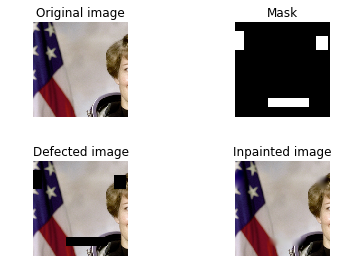

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.restoration import inpaint

image_orig = data.astronaut()[0:200, 0:200]

# Create mask with three defect regions: left, middle, right respectively
mask = np.zeros(image_orig.shape[:-1])
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1

# Defect image over the same region in each color channel
image_defect = image_orig.copy()
for layer in range(image_defect.shape[-1]):
    image_defect[np.where(mask)] = 0

image_result = inpaint.inpaint_biharmonic(image_defect, mask,
                                          multichannel=True)

fig, axes = plt.subplots(ncols=2, nrows=2)
ax = axes.ravel()

ax[0].set_title('Original image')
ax[0].imshow(image_orig)

ax[1].set_title('Mask')
ax[1].imshow(mask, cmap=plt.cm.gray)

ax[2].set_title('Defected image')
ax[2].imshow(image_defect)

ax[3].set_title('Inpainted image')
ax[3].imshow(image_result)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()